In [1]:
import pandas as pd

In [2]:
products = pd.read_csv("https://raw.githubusercontent.com/VictorGuedes/Brazilian-E-Commerce-Public-Dataset-examples/master/dataset/olist_products_dataset.csv")
order = pd.read_csv(r"https://raw.githubusercontent.com/VictorGuedes/Brazilian-E-Commerce-Public-Dataset-examples/master/dataset/olist_orders_dataset.csv")
customers = pd.read_csv("https://raw.githubusercontent.com/VictorGuedes/Brazilian-E-Commerce-Public-Dataset-examples/master/dataset/olist_customers_dataset.csv")
payments = pd.read_csv(r"https://raw.githubusercontent.com/VictorGuedes/Brazilian-E-Commerce-Public-Dataset-examples/master/dataset/olist_order_payments_dataset.csv")

In [3]:
name = ["products","order","payments","customers"]
for idx,item in zip(name,[products,order,payments,customers]):
    print(idx,"\n"
          ,"该表单的shape为{}".format(item.shape),"\n"
          ,"该表单包括如下特征{}".format(item.columns.tolist()))

products 
 该表单的shape为(32951, 9) 
 该表单包括如下特征['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
order 
 该表单的shape为(99441, 8) 
 该表单包括如下特征['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
payments 
 该表单的shape为(103886, 5) 
 该表单包括如下特征['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
customers 
 该表单的shape为(99441, 5) 
 该表单包括如下特征['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [5]:
# 合并order和customer数据集
order_customer = order.merge(customers, on='customer_id', how='inner')

# 合并order_customer和payments数据集
data = order_customer.merge(payments, on='order_id', how='inner')

In [6]:
data.shape

(103886, 16)

In [7]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [8]:
import re

#采样10个样本，此时我们需要GPT观察数据形态，因此不需要采样大规模的数据
sample_data = data.sample(10)
#恢复索引
sample_data.index = range(sample_data.shape[0])
#转变为字符串
sample_data = sample_data.to_string()
#去除转变为字符串后的空格，减少字节消耗
sample_data = re.sub(r' +', ' ', sample_data)
inputs = sample_data.replace(" ", ",")

In [9]:
inputs

',order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value\n0,8426a61c687c38a2fb35080413ec9eb4,c3b836aea9b06d84b1b9d38b41f137e1,delivered,2017-10-25,22:52:31,2017-10-25,23:07:19,2017-10-26,19:23:38,2017-10-27,15:18:00,2017-11-07,00:00:00,0a176442bca06755447ed7ae4f3f4578,4423,sao,paulo,SP,1,credit_card,3,188.94\n1,3924f091293036f904fe4c2ef928defa,cf3683cc93783df9d38bc06a1923dc0c,delivered,2018-07-23,17:26:31,2018-07-24,10:31:54,2018-08-02,19:22:00,2018-08-03,15:34:53,2018-08-08,00:00:00,f463b2fd96abeb9e915427450a802f8d,12215,sao,jose,dos,campos,SP,1,credit_card,1,180.46\n2,81192041563939605a3e86ae0d6d8579,5171d2fac93544a0e4b6ea1afb8bac3c,delivered,2017-07-25,09:07:16,2017-07-25,09:23:11,2017-07-25,22:52:59,2017-07-26,17:53:48,2017-08-07,00:00

In [10]:
import pandas as pd
import numpy as np

def preprocess_data(df):
    data = df.copy()
    # 对数据中的每一列进行遍历处理
    for col in data.columns:
        # 如果是数值型数据(float类型)，用均值填补缺失值
        if data[col].dtype == 'float32' or data[col].dtype == 'float64':
            data[col].fillna(data[col].mean(), inplace=True)
        # 如果不是数值型数据，用众数填补缺失值
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

    # 提取时间戳中的年、月、日、小时、分钟、秒
    date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
    for col in date_cols:
        data[col] = pd.to_datetime(data[col])
        data[col+'_year'] = data[col].dt.year
        data[col+'_month'] = data[col].dt.month
        data[col+'_day'] = data[col].dt.day
        data[col+'_hour'] = data[col].dt.hour
        data[col+'_minute'] = data[col].dt.minute
        data[col+'_second'] = data[col].dt.second
        data.drop(col, axis=1, inplace=True)  # 删除原始的时间戳

    # 对类别型特征进行编码
    cat_cols = ['order_status', 'customer_city', 'customer_state', 'payment_type']
    for col in cat_cols:
        data[col] = pd.factorize(data[col])[0]

    return data

In [11]:
df = preprocess_data(data)

In [12]:
df.shape

(103886, 41)

In [13]:
df.head(10)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,...,order_delivered_customer_date_day,order_delivered_customer_date_hour,order_delivered_customer_date_minute,order_delivered_customer_date_second,order_estimated_delivery_date_year,order_estimated_delivery_date_month,order_estimated_delivery_date_day,order_estimated_delivery_date_hour,order_estimated_delivery_date_minute,order_estimated_delivery_date_second
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0,7c396fd4830fd04220f754e42b4e5bff,3149,0,0,1,0,1,...,10,21,25,13,2017,10,18,0,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0,7c396fd4830fd04220f754e42b4e5bff,3149,0,0,3,1,1,...,10,21,25,13,2017,10,18,0,0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0,7c396fd4830fd04220f754e42b4e5bff,3149,0,0,2,1,1,...,10,21,25,13,2017,10,18,0,0,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,0,af07308b275d755c9edb36a90c618231,47813,1,1,1,2,1,...,7,15,27,45,2018,8,13,0,0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,0,3a653a41f6f9fc3d2a113cf8398680e8,75265,2,2,1,0,3,...,17,18,6,29,2018,9,4,0,0,0
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0,7c142cf63193a1473d2e66489a9ae977,59296,3,3,1,0,1,...,2,0,28,42,2017,12,15,0,0,0
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0,72632f0f9dd73dfee390c9b22eb56dd6,9195,4,0,1,0,1,...,16,18,17,2,2018,2,26,0,0,0
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,0,80bb27c7c16e8f973207a5086ab329e2,86320,5,4,1,0,6,...,26,10,57,55,2017,8,1,0,0,0
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,1,36edbb3fb164b1f16485364b6fb04c73,98900,6,5,1,0,1,...,22,16,4,46,2017,5,9,0,0,0
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,0,932afa1e708222e5821dac9cd5db4cae,26525,7,6,1,0,3,...,26,12,55,51,2017,6,7,0,0,0


In [14]:
import pandas as pd
from scipy.stats import skew, kurtosis

def df_summary(df):
    data = []
    columns = df.columns
    
    for col in columns:
        # 计算所需的统计量
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        mode_val = df[col].mode()[0] if not df[col].mode().empty else None
        std_val = df[col].std()
        var_val = df[col].var()
        quantile_25 = df[col].quantile(0.25)
        quantile_75 = df[col].quantile(0.75)
        median_val = df[col].median()
        quantile_1 = df[col].quantile(0.01)
        quantile_99 = df[col].quantile(0.99)
        skew_val = skew(df[col].dropna())
        kurtosis_val = kurtosis(df[col].dropna())
        
        # 计算IQR和确定是否存在异常值
        IQR = quantile_75 - quantile_25
        lower_bound = quantile_25 - 1.5 * IQR
        upper_bound = quantile_75 + 1.5 * IQR
        has_outlier = ((df[col] < lower_bound) | (df[col] > upper_bound)).any()
        
        # 将统计量数据添加到列表中
        data.append([col, has_outlier, min_val, max_val, mean_val, mode_val, std_val, var_val,
                     quantile_25, quantile_75, median_val, quantile_1, quantile_99, skew_val
                     , kurtosis_val])
    
    # 创建汇总DataFrame
    summary_df = pd.DataFrame(data, columns=["df中的列名", "是否有异常值", "最小值", "最大值"
                                             , "均值", "众数", "标准差", "方差", 
                                             "上四分位数", "下四分位数", "中位数", "1%分位数"
                                             , "99%分位数", "偏度", "峰度"])
    return summary_df

In [15]:
#注意此函数只能对数值型特征进行处理，因此我们需要主动剔除非数值型特征
dfn = df.drop(["order_id","customer_id","customer_unique_id"], axis=1)

In [16]:
result = df_summary(dfn)

In [17]:
result.head()

,df中的列名,是否有异常值,最小值,最大值,均值,众数,标准差,方差,上四分位数,下四分位数,中位数,1%分位数,99%分位数,偏度,峰度
0,order_status,True,0.0,7.0,0.092159,0.0,0.574101,3.295921e-01,0.00,0.0,0.0,0.0,4.0,6.868833,48.902497
1,customer_zip_code_prefix,False,1003.0,99990.0,35072.550555,22790.0,29743.491677,8.846753e+08,11366.25,58418.0,24360.0,1329.0,97511.0,0.782930,-0.778251
2,customer_city,True,0.0,4118.0,422.675433,0.0,708.145383,5.014699e+05,14.00,472.0,111.0,0.0,3372.0,2.550801,6.772185
3,customer_state,True,0.0,26.0,4.560047,0.0,5.517502,3.044283e+01,0.00,7.0,4.0,0.0,23.0,1.474004,2.025904
4,payment_sequential,True,1.0,29.0,1.092679,1.0,0.706584,4.992606e-01,1.00,1.0,1.0,1.0,3.0,16.179831,370.575915


In [18]:
#转变为字符串
s = result.to_string()
#去除转变为字符串后的空格，减少字节消耗
s = re.sub(r' +', ' ', s)
s = s.replace(" ", ",")

In [19]:
s #这就是我们需要使用的prompts

',df中的列名,是否有异常值,最小值,最大值,均值,众数,标准差,方差,上四分位数,下四分位数,中位数,1%分位数,99%分位数,偏度,峰度\n0,order_status,True,0.0,7.00,0.092159,0.0,0.574101,3.295921e-01,0.00,0.0000,0.0,0.00,4.0000,6.868833,48.902497\n1,customer_zip_code_prefix,False,1003.0,99990.00,35072.550555,22790.0,29743.491677,8.846753e+08,11366.25,58418.0000,24360.0,1329.00,97511.0000,0.782930,-0.778251\n2,customer_city,True,0.0,4118.00,422.675433,0.0,708.145383,5.014699e+05,14.00,472.0000,111.0,0.00,3372.0000,2.550801,6.772185\n3,customer_state,True,0.0,26.00,4.560047,0.0,5.517502,3.044283e+01,0.00,7.0000,4.0,0.00,23.0000,1.474004,2.025904\n4,payment_sequential,True,1.0,29.00,1.092679,1.0,0.706584,4.992606e-01,1.00,1.0000,1.0,1.00,3.0000,16.179831,370.575915\n5,payment_type,True,0.0,4.00,0.480739,0.0,0.848039,7.191698e-01,0.00,1.0000,0.0,0.00,3.0000,1.361017,0.200695\n6,payment_installments,True,0.0,24.00,2.853349,1.0,2.687051,7.220241e+00,1.00,4.0000,1.0,1.00,10.0000,1.655050,2.549867\n7,payment_value,True,0.0,13664.08,154.100380,50.0,217.494

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def analyse_dataframe(df):
    # 基于'order_status'对'payment_value'进行分组聚合
    order_status_agg = df.groupby('order_status')['payment_value'].sum()
    print("Sales by order status:")
    print(order_status_agg)
    print()

    # 基于'payment_type'对'payment_value'进行分组聚合
    payment_type_agg = df.groupby('payment_type')['payment_value'].sum()
    print("Sales by payment type:")
    print(payment_type_agg)
    print()

    # 创建一个以'order_purchase_timestamp'为横坐标、'payment_value'为纵坐标的折线图
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df.set_index('order_purchase_timestamp', inplace=True)
    df.resample('M')['payment_value'].sum().plot()
    plt.title('Sales Trend Over Time')
    plt.ylabel('Payment Value')
    plt.tight_layout()
    plt.show()

    # 创建一个以'order_delivered_customer_date'为横坐标，'payment_value'为纵坐标的条形图
    df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
    monthly_sales = df.resample('M')['payment_value'].sum()
    monthly_sales.plot(kind='bar')
    plt.title('Monthly Sales Delivered to Customers')
    plt.ylabel('Payment Value')
    plt.tight_layout()
    plt.show()

    # 按'customer_city'分组，对'payment_value'进行聚合，打印出销售额排名前10的城市名称
    city_sales = df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10)
    print("Top 10 cities by sales:")
    print(city_sales)

Sales by order status:
order_status
approved            241.08
canceled         143255.60
created             688.10
delivered      15422461.77
invoiced          69137.99
processing        69394.11
shipped          177213.96
unavailable      126479.51
Name: payment_value, dtype: float64

Sales by payment type:
payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64



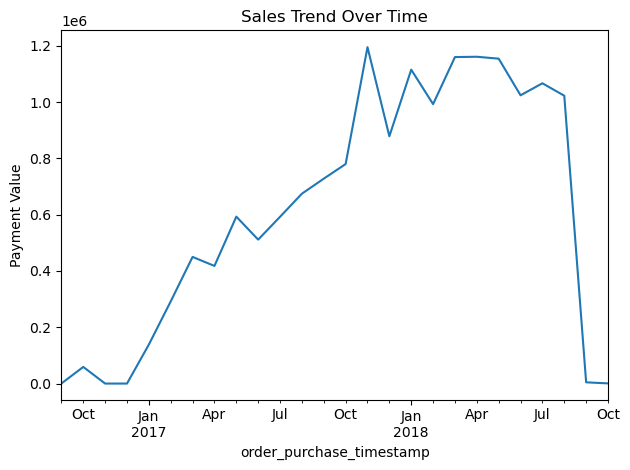

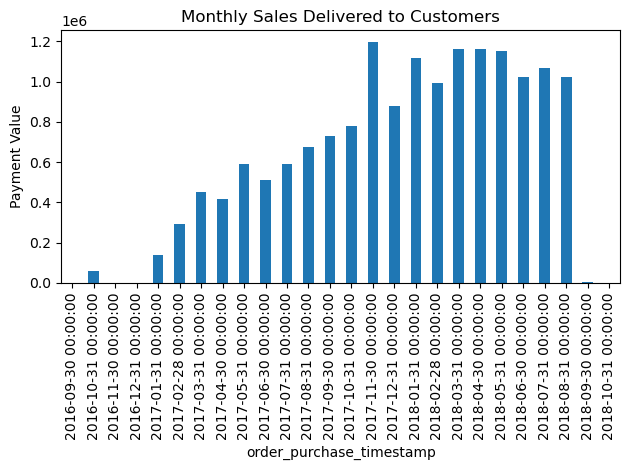

Top 10 cities by sales:
customer_city
sao paulo         2203373.09
rio de janeiro    1161927.36
belo horizonte     421765.12
brasilia           354216.78
curitiba           247392.48
porto alegre       224731.42
salvador           218071.50
campinas           216248.43
guarulhos          165121.99
niteroi            139996.99
Name: payment_value, dtype: float64


In [21]:
analyse_dataframe(data) #在这里要使用包含时间戳数据的原始数据